<font size="6"><p style="text-align:center"><b>Проект: магазин "Стримчик" </font>

# Шаг 1. Знакомство с данными

В интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры, из открытых источников данных нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.

In [1]:
import pandas as pd

In [2]:
from scipy import stats as st

In [3]:
import matplotlib.pyplot as plt

In [4]:
import numpy as np

In [5]:
data = pd.read_csv('/datasets/games.csv')

In [6]:
data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


***Вывод:***
Нам представленны данные о продажах игр: 11 столбцов и 16715 строк.

# Шаг 2. Подготовка данных

In [8]:
data = data.rename(columns={'Name': 'name', 'Platform': 'platform', 'Year_of_Release': 'year_of_release',
                            'Genre': 'genre', 'NA_sales': 'na_sales', 'EU_sales': 'eu_sales',
                            'JP_sales': 'jp_sales', 'Other_sales': 'other_sales',
                            'Critic_Score': 'critic_score', 'User_Score': 'user_score', 'Rating': 'rating'})

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
# check
# пропущенные значения бары

def pass_value_barh(df):
    try:
        (
            (df.isna().mean()*100)
            .to_frame()
            .rename(columns = {0:'space'})
            .query('space > 0')
            .sort_values(by = 'space', ascending = True)
            .plot(kind = 'barh', figsize = (19,6), rot = -5, legend = False, fontsize = 16)
            .set_title('Пример' + "\n", fontsize = 22, color = 'SteelBlue')    
        );    
    except:
        print('пропусков не осталось :) или произошла ошибка в первой части функции ')

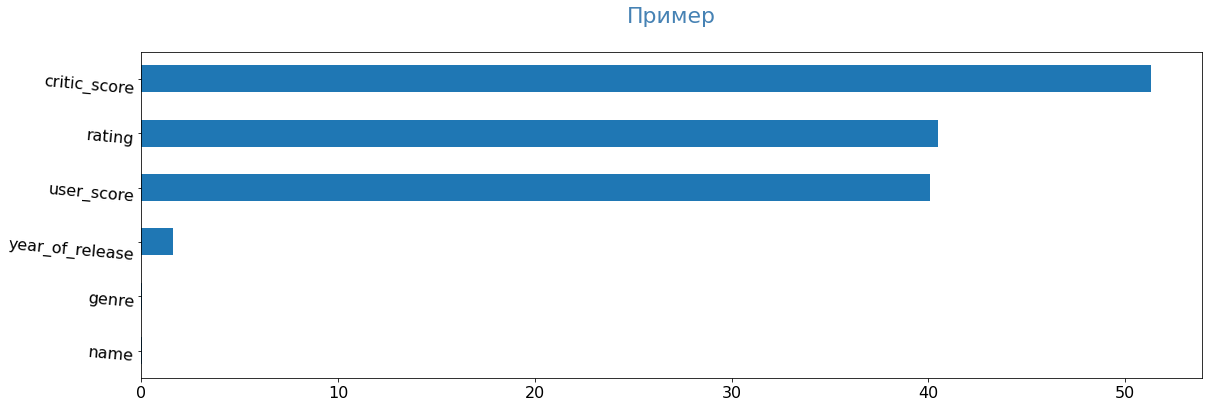

In [11]:
pass_value_barh(data)

In [12]:
data.loc[:,'total_sales'] = data.loc[:,'na_sales'] + data.loc[:,'eu_sales'] + data.loc[:,'jp_sales'] + data.loc[:,'other_sales']

In [13]:
data.loc[data['user_score'] == "tbd", 'user_score'] = np.nan

In [14]:
data['user_score'] = data['user_score'].astype('float')

In [15]:
data['rating'].value_counts()

E       3990
T       2961
M       1563
E10+    1420
EC         8
RP         3
K-A        3
AO         1
Name: rating, dtype: int64

In [16]:
data['rating'] = data['rating'].fillna(value='undef')

Пропущенный рейтинг я решила заменить на значение по умолчанию.

In [17]:
# check
data['rating'].value_counts()

undef    6766
E        3990
T        2961
M        1563
E10+     1420
EC          8
RP          3
K-A         3
AO          1
Name: rating, dtype: int64

In [18]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         9125
rating                0
total_sales           0
dtype: int64

In [19]:
data.loc[:,'user_score'] = data.loc[:,'user_score'].astype('float')

In [20]:
data[data['year_of_release'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
183,Madden NFL 2004,PS2,NaN,Sports,4.26,0.26,0.01,0.71,94.0,8.5,E,5.24
377,FIFA Soccer 2004,PS2,NaN,Sports,0.59,2.36,0.04,0.51,84.0,6.4,E,3.50
456,LEGO Batman: The Videogame,Wii,NaN,Action,1.80,0.97,0.00,0.29,74.0,7.9,E10+,3.06
475,wwe Smackdown vs. Raw 2006,PS2,NaN,Fighting,1.57,1.02,0.00,0.41,NaN,NaN,undef,3.00
609,Space Invaders,2600,NaN,Shooter,2.36,0.14,0.00,0.03,NaN,NaN,undef,2.53
...,...,...,...,...,...,...,...,...,...,...,...,...
16373,PDC World Championship Darts 2008,PSP,NaN,Sports,0.01,0.00,0.00,0.00,43.0,NaN,E10+,0.01
16405,Freaky Flyers,GC,NaN,Racing,0.01,0.00,0.00,0.00,69.0,6.5,T,0.01
16448,Inversion,PC,NaN,Shooter,0.01,0.00,0.00,0.00,59.0,6.7,M,0.01
16458,Hakuouki: Shinsengumi Kitan,PS3,NaN,Adventure,0.01,0.00,0.00,0.00,NaN,NaN,undef,0.01


Продажи принесенные в пропущенные года совсем не значительны, поэтому их можно смело удалить.

In [21]:
data = data.dropna(subset=['year_of_release'])

In [22]:
data.loc[:,'year_of_release'] = data.loc[:,'year_of_release'].astype('int')

In [23]:
data[data['name'].isna() == True]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,undef,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,undef,0.03


In [24]:
data = data.drop(data[data['name'].isna() == True].index)
data

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,undef,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,undef,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,undef,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,undef,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,undef,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,undef,0.01


In [25]:
data.isna().sum()

name                  0
platform              0
year_of_release       0
genre                 0
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8461
user_score         8981
rating                0
total_sales           0
dtype: int64

In [26]:
data.duplicated().sum()

0

In [27]:
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()

In [28]:
data.duplicated(subset=['name', 'platform', 'year_of_release']).sum()

1

In [29]:
data = data.drop_duplicates(subset=['name', 'platform', 'year_of_release']).reset_index(drop=True)

*** Вывод *** : 

Очень много пропущенных данных в столбцах user_score, critic_score, rating. 

Пропущенные данные в годе релиза я удалила, так как они приносят мало прибыли, что для данных не так весомо.

Также я удалила 2 строчки с пропущенными именем и жанром.

Строки, где в user_score было указано "tbd", я заменила пропусками. 

Пропущенные категориальные данные в рейтинге удалось обработать и заменить на "undef".

# Шаг 3. Исследовательский анализ

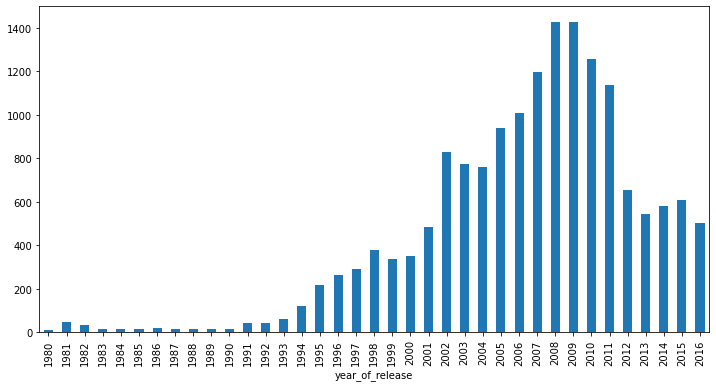

In [30]:
year_of_release = data.groupby('year_of_release')['name'].count()
year_of_release.plot(kind='bar', figsize=(12,6));

Я думаю, что данные до 1993 включительно не так важны.

In [31]:
platform_total_sales = data.groupby('platform')['total_sales'].sum().sort_values(ascending=False).head(20)

In [32]:
platform_total_sales # потенциально прибыльные платформы

platform
ps2     1233.56
x360     961.24
ps3      931.33
wii      891.18
ds       802.78
ps       727.58
ps4      314.14
gba      312.88
psp      289.53
3ds      257.81
pc       255.76
gb       254.43
xb       251.57
nes      251.05
n64      218.01
snes     200.04
gc       196.73
xone     159.32
2600      86.48
wiiu      82.19
Name: total_sales, dtype: float64

In [33]:
data_pivot = data.query('platform in @platform_total_sales.index and year_of_release > 2003').pivot_table(index='year_of_release', columns='platform', 
                              values='total_sales', aggfunc='sum')

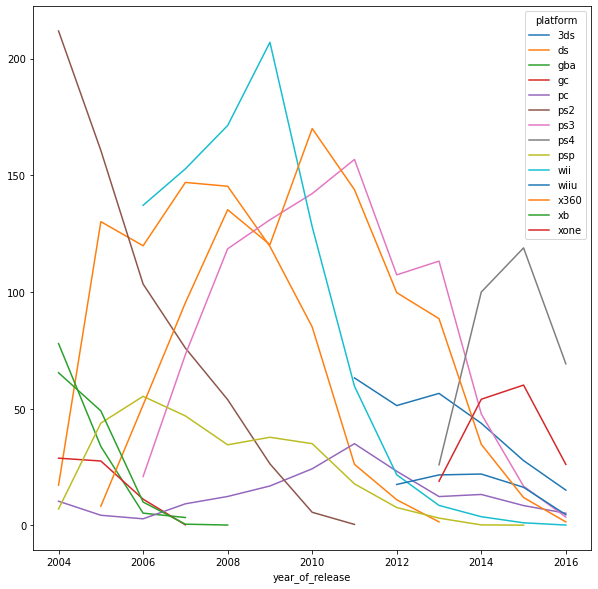

In [34]:
data_pivot.plot(figsize=(10,10));

Характерный срок от начала до завершения продаж составляет в среднем 10 лет

In [35]:
data_actual = data.query('year_of_release >= 2014')

In [36]:
data_actual.groupby('platform')['total_sales'].sum().sort_values(ascending=False)

platform
ps4     288.15
xone    140.36
3ds      86.68
ps3      68.18
x360     48.22
wiiu     42.98
pc       27.05
psv      22.40
wii       5.07
psp       0.36
Name: total_sales, dtype: float64

Лидируют по продажам PS4, XOne 3DS

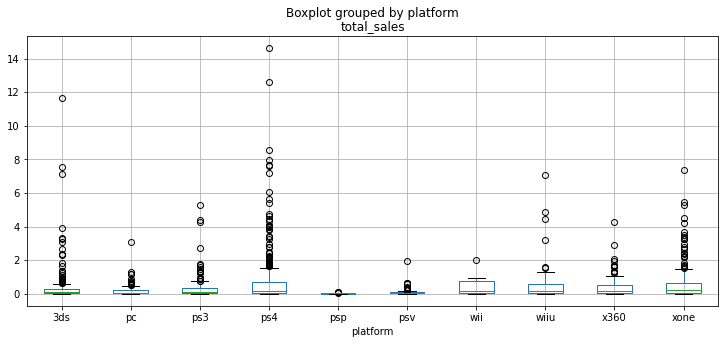

In [37]:
pd.plotting.boxplot(data_actual, column='total_sales', by='platform', figsize=(12,5));

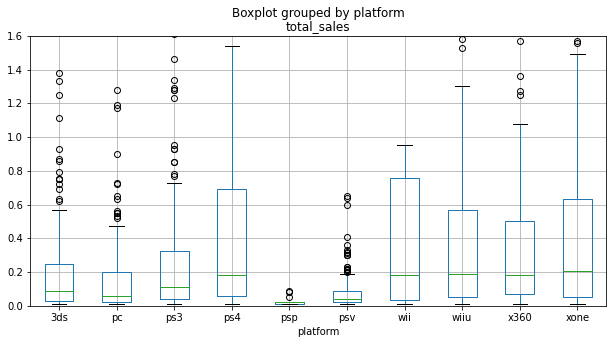

In [38]:
pd.plotting.boxplot(data_actual, column='total_sales', by='platform', figsize=(10,5));
plt.ylim([0, 1.6]);

Медиана ориентировочно равна 0,1. Видна тенденция, что все продажи лежат в пределе от 0 до 1.5 млн. Есть немного выбросов.

Самые перспективные платформы на 2017 год: ps4, 3ds и xone

In [39]:
platform_ps4 = data.query('platform == "ps4"')

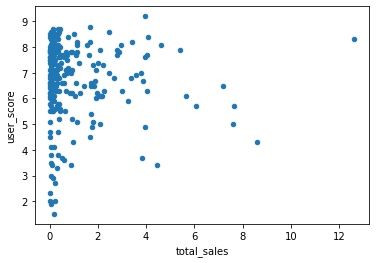

In [40]:
platform_ps4.plot(x='total_sales',y='user_score',kind='scatter');

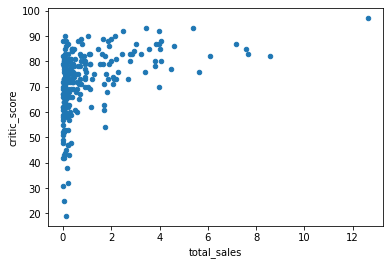

In [41]:
platform_ps4.plot(x='total_sales',y='critic_score',kind='scatter');

In [42]:
platform_ps4['total_sales'].corr(data['user_score'])

-0.031957110204556376

In [43]:
platform_ps4['total_sales'].corr(data['critic_score'])

0.406567902061781

Нет связи между продажами и отзывами пользователей, немного на продажи влияют отзывы критиков.

*** Другие платформы ***

In [44]:
platform_3ds = data.query('platform == "3ds"')

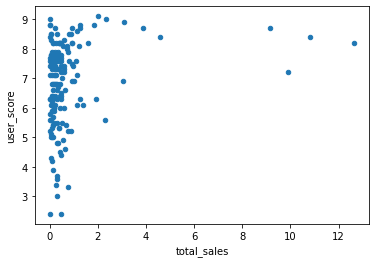

In [45]:
platform_3ds.plot(x='total_sales',y='user_score',kind='scatter');

In [46]:
platform_3ds['total_sales'].corr(data['user_score'])

0.22207843643390884

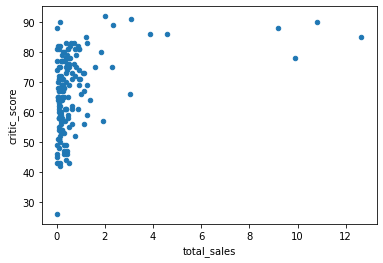

In [47]:
platform_3ds.plot(x='total_sales',y='critic_score',kind='scatter');

In [48]:
platform_3ds['total_sales'].corr(data['critic_score'])

0.34873973059848346

In [49]:
platform_xone = data.query('platform == "xone"')

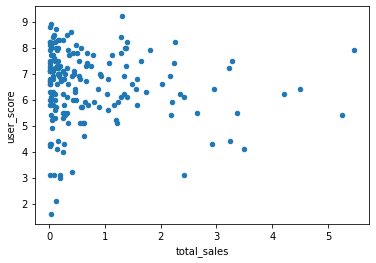

In [50]:
platform_xone.plot(x='total_sales',y='user_score',kind='scatter');

In [51]:
platform_xone['total_sales'].corr(data['user_score'])

-0.06892505328279412

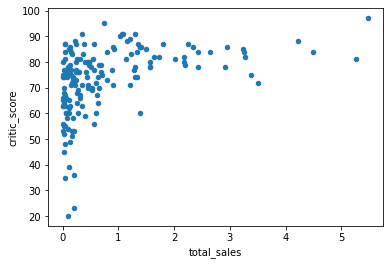

In [52]:
platform_xone.plot(x='total_sales',y='critic_score',kind='scatter');

In [53]:
platform_xone['total_sales'].corr(data['critic_score'])

0.41699832800840175

С остальными платформами аналогичная ситуация, только у платформы 3ds наблюдается малая связь с оценками пользователей.

In [54]:
data_actual.groupby('genre')['total_sales'].count().sort_values()

genre
Puzzle           14
Strategy         37
Platform         38
Simulation       44
Fighting         60
Racing           69
Misc            113
Shooter         128
Sports          161
Adventure       185
Role-Playing    221
Action          619
Name: total_sales, dtype: int64

In [55]:
data_actual.groupby('genre')['total_sales'].sum().sort_values()

genre
Puzzle            2.21
Strategy          3.96
Simulation       13.13
Adventure        17.55
Platform         18.09
Racing           27.52
Fighting         28.22
Misc             37.55
Role-Playing    101.44
Sports          109.48
Shooter         170.94
Action          199.36
Name: total_sales, dtype: float64

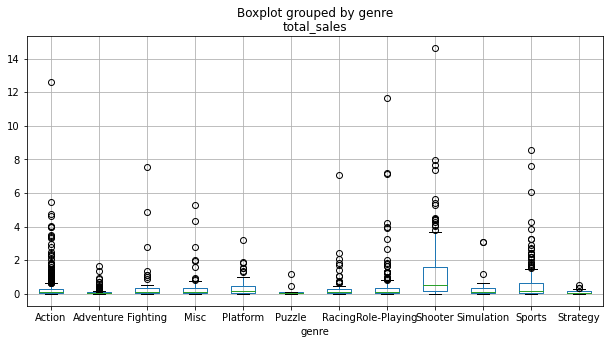

In [56]:
pd.plotting.boxplot(data_actual, column='total_sales', by='genre', figsize=(10,5));

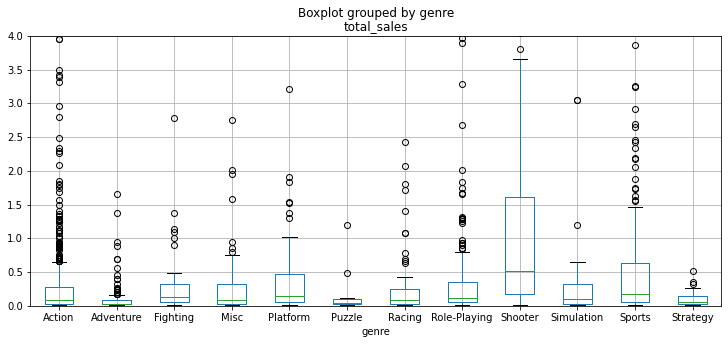

In [57]:
pd.plotting.boxplot(data_actual, column='total_sales', by='genre', figsize=(12,5));
plt.ylim([0, 4]);

Самые прибыльные жанры - shooter, action и sports, а самым популярным жанром является action и самый не популярный - puzzle. Меньше всего приносят прибыль strategy, simulation и puzzle.

# Шаг 4. Составление портрета пользователей каждого региона

Самые популярные платформы (топ-5).

Самые популярные жанры (топ-5).

In [58]:
region_na = data_actual.groupby('platform')['na_sales'].sum().sort_values(ascending=False).head()
other_na = pd.Series([sum(data_actual.groupby('platform')['na_sales'].
                        sum().sort_values(ascending=False).tail(4))], index=['other'])
region_na = region_na.append(other_na)
print(region_na)
na_sum = region_na.sum()

ps4      98.61
xone     81.27
x360     28.30
3ds      22.64
ps3      22.05
other    11.83
dtype: float64


In [59]:
region_eu = data_actual.groupby('platform')['eu_sales'].sum().sort_values(ascending=False).head()
other_eu = pd.Series([sum(data_actual.groupby('platform')['eu_sales'].
                        sum().sort_values(ascending=False).tail(4))], index=['other'])
region_eu = region_eu.append(other_eu)
print(region_eu)
eu_sum = region_eu.sum()

ps4      130.04
xone      46.25
ps3       25.54
pc        17.97
3ds       16.12
other     19.27
dtype: float64


In [60]:
region_jp = data_actual.groupby('platform')['jp_sales'].sum().sort_values(ascending=False).head()
other_jp = pd.Series([sum(data_actual.groupby('platform')['jp_sales'].
                        sum().sort_values(ascending=False).tail(4))], index=['other'])
region_jp = region_jp.append(other_jp)
print(region_jp)
jp_sum = region_jp.sum()

3ds      44.24
ps4      15.02
psv      14.54
ps3      11.22
wiiu      7.31
other     0.40
dtype: float64


In [61]:
total_sum = na_sum + eu_sum + jp_sum
print(f'NA = {na_sum / total_sum * 100 :.2f} %')
print(f'EU = {eu_sum / total_sum * 100 :.2f} %')
print(f'JP = {jp_sum / total_sum * 100 :.2f} %')

NA = 43.21 %
EU = 41.66 %
JP = 15.14 %


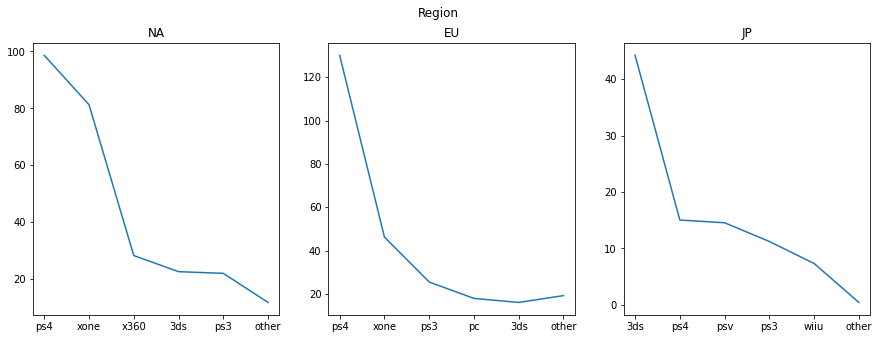

In [62]:
fig, axes = plt.subplots(1, 3)
plt.suptitle('Region')
region_na.plot(ax=axes[0], title='NA', figsize=(15, 5));
region_eu.plot(ax=axes[1], title='EU');
region_jp.plot(ax=axes[2], title='JP');

Самые популярные платформы приносят больше всего прибыли в Европе и в Северной Америке и меньше всего в Японии.

In [63]:
genre_na = data_actual.groupby('genre')['na_sales'].sum().sort_values(ascending=False).head()
other_na = pd.Series([sum(data_actual.groupby('genre')['na_sales'].
                        sum().sort_values(ascending=False).tail(7))], index=['other'])
genre_na = genre_na.append(other_na)

In [64]:
genre_eu = data_actual.groupby('genre')['eu_sales'].sum().sort_values(ascending=False).head()
other_eu = pd.Series([sum(data_actual.groupby('genre')['eu_sales'].
                        sum().sort_values(ascending=False).tail(7))], index=['other'])
genre_eu = genre_eu.append(other_eu)

In [65]:
genre_jp = data_actual.groupby('genre')['jp_sales'].sum().sort_values(ascending=False).head()
other_jp = pd.Series([sum(data_actual.groupby('genre')['jp_sales'].
                        sum().sort_values(ascending=False).tail(7))], index=['other'])
genre_jp = genre_jp.append(other_jp)

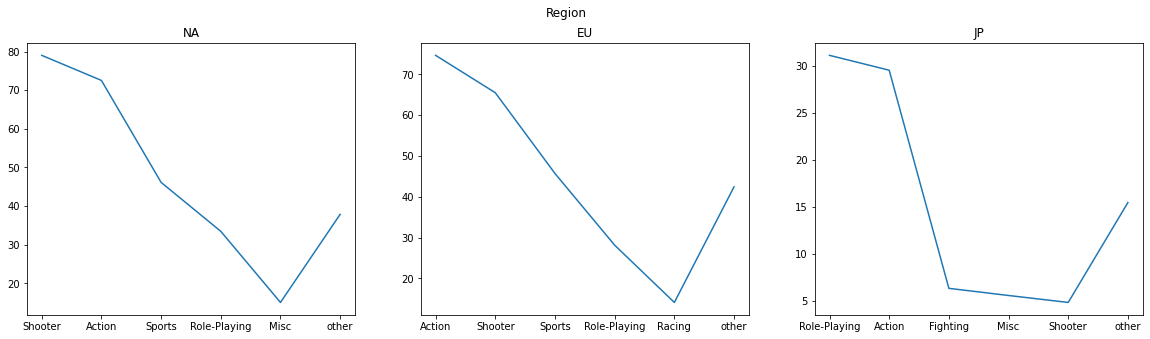

In [66]:
fig, axes = plt.subplots(1, 3)
plt.suptitle('Region')
genre_na.plot(ax=axes[0], title='NA', figsize=(20,5));
genre_eu.plot(ax=axes[1], title='EU');
genre_jp.plot(ax=axes[2], title='JP');

В Северной Америке, Европе самый популярный жанры shooter, action и sports, а в Японии - action, role-playing и fighting.

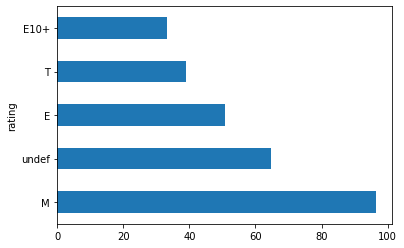

In [67]:
data_actual_na = data_actual.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
data_actual_na.plot(y='rating', kind='barh');

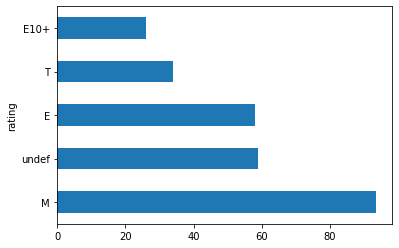

In [68]:
data_actual_eu = data_actual.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
data_actual_eu.plot(y='rating', kind='barh');

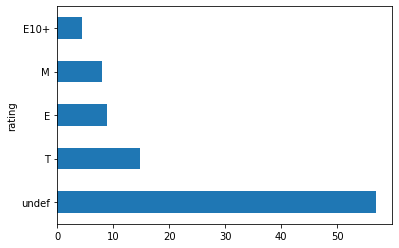

In [69]:
data_actual_jp = data_actual.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
data_actual_jp.plot(y='rating', kind='barh');

# Шаг 5. Проверка гипотез

Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;

Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [70]:
alpha = 0.05

In [71]:
data_without_nan = data.dropna(subset=['user_score'])
mean_user_rating_x_one = data_without_nan.query('platform == "xone"')['user_score']
mean_user_rating_pc = data_without_nan.query('platform == "pc" and year_of_release > 2012')['user_score']

In [72]:
len(mean_user_rating_x_one)

182

In [73]:
len(mean_user_rating_pc)

155

Нулевая гипотеза: пользовательские рейтинги платформ XOne и PC равны

Альтернативная гипотеза: пользовательские рейтинги платформ XOne и PC не равны

In [74]:
results = st.ttest_ind(mean_user_rating_x_one, mean_user_rating_pc, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Не отклоняем нулевую гипотезу')

p-value: 0.14759594013430463
Не отклоняем нулевую гипотезу


Нулевая гипотеза: Средние пользовательские рейтинги жанров Action и Sports равны.

Альтернативная гипотеза: Средние пользовательские рейтинги жанров Action и Sports не равны.

In [76]:
mean_user_rating_action = data_without_nan.query('genre == "Action"')['user_score']
mean_user_rating_sports = data_without_nan.query('genre == "Sports"')['user_score']

In [77]:
results = st.ttest_ind(mean_user_rating_action, mean_user_rating_sports, equal_var=False)
print('p-value:', results.pvalue)
if results.pvalue < alpha:
    print('Отклоняем нулевую гипотезу')
else:
    print('Не отклоняем нулевую гипотезу')

p-value: 0.07751671595536253
Не отклоняем нулевую гипотезу


Я применила для проверки гипотез критерий о равенстве среднего двух генеральных совокупностей по взятым из них выборкам.

# Шаг 6. Вывод

После анализа данных я пришла к следующим выводам:

Самые перспективные платформы на 2017 год: ps4, 3ds и xone.

В Северной Америке, Европе самый популярный жанры shooter, action и sports, а в Японии - action, role-playing и shooter.

Самые популярные платформы приносят больше всего прибыли в Европе и в Северной Америке и меньше всего в Японии.
А именно: NA = 42.93 %; EU = 41.41 %; JP = 15.67 %.

Самые популярные платформы: ps4, xone, 3ds.

Самый популярный рейтинг М. К сожалению, много данных в рейтинге пропущенно, поэтому мы не можем увидеть реальную картину.